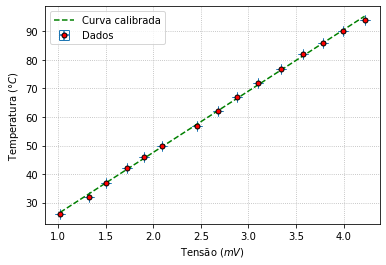

In [21]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import ZebraLib as zb

#Dados
y = np.array([26, 32, 37, 42, 46, 50, 57, 62, 67, 72, 77, 82, 86, 90, 94])
x = np.array([1.02, 1.32, 1.5, 1.72, 1.9, 2.09, 2.46, 2.68, 2.88, 3.1, 3.34, 3.57, 3.78, 3.99, 4.22])
erx = np.full_like(np.arange(0, len(x), dtype=int), fill_value=0.25)
ery = np.full_like(np.arange(0, len(x), dtype=int), fill_value=0.001)

#Figura
fig, ax = plt.subplots()
ax.set(ylabel=r'Temperatura ($°C$)', xlabel=r'Tensão ($mV$)')

#Erros de medida e dados
#ax.scatter(x, y, color='red', label='Dados')
ax.errorbar(x, y, xerr=erx, yerr=ery, fmt='o', markeredgecolor='black', 
            markerfacecolor='red', label='Dados', markersize=5, capsize=5)

#Regressão linear dos dados
res = scipy.stats.linregress(x, y)
ax.plot(x, res.intercept + res.slope*x, linestyle='--', color='green'
        #,label=r'Aproximação $r^2=$' + f'{res.rvalue:.4f}')
        ,label='Curva calibrada')

ax.grid(ls='dotted')
ax.legend()

In [23]:
#Desvio médio RMS
N = abs((res.intercept + res.slope*x) - y)**2
N = sum(N)
A = np.sqrt(N/len(x))

#Equaçao da reta
f'T=({res.intercept:.3f} + {res.slope:.3f}*x) +- {A:.4f}'

'T=(4.614 + 21.501*x) +- 0.6183'

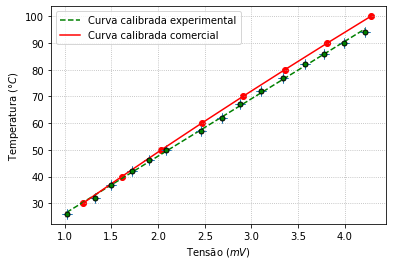

In [39]:
y_teorico = np.arange(30, 101, 10)
x_teorico = np.array([1.196, 1.612, 2.036, 2.468, 2.909, 3.358, 3.814, 4.279])

#Figura
fig, ax = plt.subplots()
ax.set(ylabel=r'Temperatura ($°C$)', xlabel=r'Tensão ($mV$)')

#Dados experimentais
ax.plot(x, res.intercept + res.slope*x, linestyle='--', color='green'
        ,label='Curva calibrada experimental')
ax.errorbar(x, y, xerr=erx, yerr=ery, fmt='o', markeredgecolor='black', 
            markerfacecolor='green', markersize=5, capsize=5)

#Dados teoricos
#Regressão linear dos dados
res = scipy.stats.linregress(x_teorico, y_teorico)
ax.plot(x_teorico, y_teorico, color='red'
        ,label='Curva calibrada comercial')
        
ax.scatter(x_teorico, y_teorico, color='red')

ax.grid(ls='dotted')
ax.legend()

In [41]:
N = abs((res.intercept + res.slope*x_teorico) - y_teorico)**2
N = sum(N)
A = np.sqrt(N/len(x_teorico))

#Equaçao da reta
f'T=({res.intercept:.3f} + {res.slope:.3f}*x) +- {A:.4f}'

'T=(3.516 + 22.696*x) +- 0.4236'

In [54]:
#Comparando as duas curvas
res1 = scipy.stats.linregress(x_teorico, y_teorico)
res2 = scipy.stats.linregress(x, y)

f = np.linspace(1, 4, 8)

E1=(res1.intercept + res1.slope*f)
E2=(res2.intercept + res2.slope*f)

erro = abs((E2-E1)/E1)*100
erro

array([0.37103771, 1.69605906, 2.4566184 , 2.95007168, 3.29611131,
       3.55220991, 3.74940014, 3.90591082])

In [57]:
df = pd.DataFrame({'U':f, 'E1':E1, 'E2':E2, 'Erro':erro})
df.to_excel('erro.xlsx')

In [38]:
fig.savefig('tabela_UxT_teorico.pdf', bbox_inches='tight')
df = pd.DataFrame({'T(ºC)':x, 'U(V)':y})
df.to_excel('Exp_1_dados.xlsx')